## Install dependencjes

**Note:** Let's install the `inference-gpu` library, which will be used to efficiently run our object detection and keypoint detection models on GPUs. `inference-gpu` utilizes the `onnxruntime-gpu` library internally for optimal performance. We'll install a specific version of `onnxruntime-gpu` to guarantee compatibility with the CUDA 12 environment in Google Colab.

In [ ]:
!pip install -q gdown inference-gpu pykalman filterpy
!pip install -q onnxruntime-gpu==1.18.0 --index-url https://aiinfra.pkgs.visualstudio.com/PublicPackages/_packaging/onnxruntime-cuda-12/pypi/simple/

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.7/950.7 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.2 MB

**Note:** Let's make sure we have the latest features in the supervision library by installing version `0.23.0` or higher.

In [ ]:
!pip uninstall -y supervision && pip install -q supervision>=0.23.0

Found existing installation: supervision 0.25.1
Uninstalling supervision-0.25.1:
  Successfully uninstalled supervision-0.25.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir("/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-3778497c2c87>", line 4, in <cell line: 0>
    os.chdir("/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids")
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
          ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/c

**Note:** Let's download a few sample videos from the [DFL - Bundesliga Data Shootout](https://www.kaggle.com/competitions/dfl-bundesliga-data-shootout) Kaggle competition using gdown.



In [ ]:


#!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
#!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
#!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
#!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
#!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"


In [11]:
import os
os.chdir("/content/drive/MyDrive/Object-Tracking-EKF-YOLO")
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Object-Tracking-EKF-YOLO'

## ball, player, goalkeeper and referee detection

In [ ]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/11"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)

In [ ]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids/121364_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

# ** Kalman Filter Implementation **

In [ ]:
!pip install pykalman
from pykalman import KalmanFilter
import numpy as np

class BallEKFPyKalman:
    def __init__(self, dt=1/25):
        self.dt = dt  # Time step (e.g., 25 FPS)

        # State: [x, y, vx, vy, ax, ay]
        self.state_dim = 6  # Dimensionality of the state
        self.obs_dim = 2    # Dimensionality of the observation ([x, y])

        # Define transition matrix (F)
        dt2 = 0.5 * self.dt ** 2
        self.F = np.array([
            [1, 0, self.dt, 0, dt2, 0],   # x
            [0, 1, 0, self.dt, 0, dt2],   # y
            [0, 0, 1, 0, self.dt, 0],     # vx
            [0, 0, 0, 1, 0, self.dt],     # vy
            [0, 0, 0, 0, 1, 0],           # ax
            [0, 0, 0, 0, 0, 1]            # ay
        ])

        # Define observation matrix (H)
        self.H = np.array([
            [1, 0, 0, 0, 0, 0],  # Maps x
            [0, 1, 0, 0, 0, 0]   # Maps y
        ])

        # Process noise covariance (Q) — slightly reduced for smoother motion
        self.Q = np.diag([0.08, 0.08, 1.2, 1.2, 4.0, 4.0])

        # Measurement noise covariance (R) — lowered for more reliance on measurements
        self.base_R = np.diag([0.1, 0.1])  # Lowered for better responsiveness

        # Initial state and covariance
        self.initial_state = np.array([0, 0, 0, 0, 0, 0])
        self.initial_covariance = np.eye(6) * 1000  # Keeps strong initialization

        # Initialize the KalmanFilter object
        self.kf = KalmanFilter(
            transition_matrices=self.F,
            observation_matrices=self.H,
            transition_covariance=self.Q,
            observation_covariance=self.base_R,  # Adjusted dynamically in update
            initial_state_mean=self.initial_state,
            initial_state_covariance=self.initial_covariance
        )

        # Set initial state and covariance
        self.current_state_mean = self.initial_state
        self.current_state_covariance = self.initial_covariance

    def predict(self):
        """Perform the prediction step."""
        self.current_state_mean, self.current_state_covariance = self.kf.filter_update(
            filtered_state_mean=self.current_state_mean,
            filtered_state_covariance=self.current_state_covariance
        )

    def update(self, measurement, confidence=1.0):
        """Perform the update step with a new measurement and dynamic noise adjustment."""
        # Dynamically adjust measurement noise covariance based on detection confidence
        adaptive_R = self.base_R * (1.0 / confidence)  # Lower confidence → higher noise
        self.kf.observation_covariance = adaptive_R

        self.current_state_mean, self.current_state_covariance = self.kf.filter_update(
            filtered_state_mean=self.current_state_mean,
            filtered_state_covariance=self.current_state_covariance,
            observation=measurement
        )

    def get_state(self):
        """Retrieve the current estimated state."""
        return self.current_state_mean


In [ ]:
import supervision as sv
from tqdm import tqdm
import cv2
import csv

# Initialize EKF
ball_tracker = BallEKFPyKalman(dt=1/25)
  # Assuming 25  FPS

# Supervision annotators
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Video processing setup
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids/573e61_0.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids/573e61_0_result_1.mp4"

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

BALL_ID = 0  # Replace this with the actual class ID for the ball

# Initialize lists to store predicted and actual positions
predicted_positions = []  # Format: [(frame_index, predicted_x, predicted_y), ...]
actual_positions = []  # Format: [(frame_index, actual_x, actual_y), ...]

with video_sink:
    for frame_index, frame in enumerate(tqdm(frame_generator, total=video_info.total_frames)):

        # Infer detections for the current frame
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        # Separate ball detections
        ball_detections = detections[detections.class_id == BALL_ID]

        if len(ball_detections) > 0:
            # Get ball position and update EKF
            ball_x = (ball_detections.xyxy[0][0] + ball_detections.xyxy[0][2]) / 2
            ball_y = (ball_detections.xyxy[0][1] + ball_detections.xyxy[0][3]) / 2
            measurement = np.array([ball_x, ball_y])
            ball_tracker.update(measurement)

            # Save actual position
            actual_positions.append((frame_index, ball_x, ball_y))
        else:
            # No detection, predict based on EKF
            ball_tracker.predict()

            # Save a placeholder for missing actual position
            actual_positions.append((frame_index, None, None))

        # Get the current state
        state = ball_tracker.get_state()
        predicted_x, predicted_y = state[0], state[1]

        # Save predicted position
        predicted_positions.append((frame_index, predicted_x, predicted_y))

        # Annotate the ball
        annotated_frame = frame.copy()
        if len(ball_detections) > 0:
            annotated_frame = triangle_annotator.annotate(
                scene=annotated_frame, detections=ball_detections
            )
        else:
            # Draw predicted position if no detection
            cv2.circle(annotated_frame, (int(predicted_x), int(predicted_y)), 10, (0, 255, 0), -1)

        # Annotate other objects
        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections.class_id -= 1

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence in zip(all_detections['class_name'], all_detections.confidence)
        ]
        annotated_frame = box_annotator.annotate(annotated_frame, all_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

        # Write annotated frame to the video
        video_sink.write_frame(annotated_frame)

        # Print frame info every 5th frame
        if frame_index % 5 == 0:
            print(f"Frame {frame_index}: {len(detections)} detections")

# Save positions to a CSV file for comparison
output_file_path = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/positions.csv"
with open(output_file_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Frame", "Predicted_X", "Predicted_Y", "Actual_X", "Actual_Y"])
    for (frame_index_p, px, py), (frame_index_a, ax, ay) in zip(predicted_positions, actual_positions):
        writer.writerow([frame_index_p, px, py, ax, ay])

print(f"Predicted and actual positions saved to {output_file_path}")



  0%|          | 1/750 [00:00<05:06,  2.44it/s]

Frame 0: 22 detections


  1%|          | 6/750 [00:01<03:50,  3.23it/s]

Frame 5: 22 detections


  1%|▏         | 11/750 [00:03<03:39,  3.37it/s]

Frame 10: 23 detections


  2%|▏         | 16/750 [00:04<03:43,  3.28it/s]

Frame 15: 24 detections


  3%|▎         | 21/750 [00:06<03:26,  3.54it/s]

Frame 20: 23 detections


  3%|▎         | 26/750 [00:07<03:22,  3.57it/s]

Frame 25: 23 detections


  4%|▍         | 31/750 [00:09<03:21,  3.57it/s]

Frame 30: 24 detections


  5%|▍         | 36/750 [00:10<03:17,  3.61it/s]

Frame 35: 23 detections


  5%|▌         | 41/750 [00:11<03:20,  3.53it/s]

Frame 40: 22 detections


  6%|▌         | 46/750 [00:13<03:20,  3.51it/s]

Frame 45: 21 detections


  7%|▋         | 51/750 [00:14<03:18,  3.52it/s]

Frame 50: 22 detections


  7%|▋         | 56/750 [00:16<03:33,  3.25it/s]

Frame 55: 21 detections


  8%|▊         | 61/750 [00:17<03:32,  3.24it/s]

Frame 60: 22 detections


  9%|▉         | 66/750 [00:19<03:34,  3.19it/s]

Frame 65: 22 detections


  9%|▉         | 71/750 [00:20<03:19,  3.41it/s]

Frame 70: 22 detections


 10%|█         | 76/750 [00:22<03:16,  3.43it/s]

Frame 75: 22 detections


 11%|█         | 81/750 [00:23<03:14,  3.44it/s]

Frame 80: 23 detections


 11%|█▏        | 86/750 [00:25<03:16,  3.38it/s]

Frame 85: 22 detections


 12%|█▏        | 91/750 [00:26<03:13,  3.41it/s]

Frame 90: 23 detections


 13%|█▎        | 96/750 [00:28<03:13,  3.38it/s]

Frame 95: 23 detections


 13%|█▎        | 101/750 [00:29<03:16,  3.31it/s]

Frame 100: 23 detections


 14%|█▍        | 106/750 [00:31<03:26,  3.12it/s]

Frame 105: 23 detections


 15%|█▍        | 111/750 [00:32<03:22,  3.15it/s]

Frame 110: 23 detections


 15%|█▌        | 116/750 [00:34<03:12,  3.30it/s]

Frame 115: 23 detections


 16%|█▌        | 121/750 [00:35<03:07,  3.36it/s]

Frame 120: 23 detections


 17%|█▋        | 126/750 [00:37<03:05,  3.36it/s]

Frame 125: 24 detections


 17%|█▋        | 131/750 [00:38<03:02,  3.38it/s]

Frame 130: 24 detections


 18%|█▊        | 136/750 [00:40<03:00,  3.39it/s]

Frame 135: 24 detections


 19%|█▉        | 141/750 [00:41<02:58,  3.41it/s]

Frame 140: 24 detections


 19%|█▉        | 146/750 [00:43<03:02,  3.32it/s]

Frame 145: 24 detections


 20%|██        | 151/750 [00:45<03:37,  2.75it/s]

Frame 150: 24 detections


 21%|██        | 156/750 [00:46<03:11,  3.10it/s]

Frame 155: 25 detections


 21%|██▏       | 161/750 [00:48<03:00,  3.26it/s]

Frame 160: 23 detections


 22%|██▏       | 166/750 [00:49<02:50,  3.43it/s]

Frame 165: 24 detections


 23%|██▎       | 171/750 [00:51<02:47,  3.47it/s]

Frame 170: 25 detections


 23%|██▎       | 176/750 [00:52<02:44,  3.48it/s]

Frame 175: 23 detections


 24%|██▍       | 181/750 [00:54<02:45,  3.43it/s]

Frame 180: 24 detections


 25%|██▍       | 186/750 [00:55<02:43,  3.46it/s]

Frame 185: 23 detections


 25%|██▌       | 191/750 [00:56<02:40,  3.49it/s]

Frame 190: 23 detections


 26%|██▌       | 196/750 [00:58<02:42,  3.41it/s]

Frame 195: 23 detections


 27%|██▋       | 201/750 [00:59<02:46,  3.30it/s]

Frame 200: 24 detections


 27%|██▋       | 206/750 [01:01<02:48,  3.24it/s]

Frame 205: 23 detections


 28%|██▊       | 211/750 [01:02<02:39,  3.37it/s]

Frame 210: 24 detections


 29%|██▉       | 216/750 [01:04<02:32,  3.50it/s]

Frame 215: 25 detections


 29%|██▉       | 221/750 [01:05<02:30,  3.52it/s]

Frame 220: 23 detections


 30%|███       | 226/750 [01:07<02:29,  3.51it/s]

Frame 225: 25 detections


 31%|███       | 231/750 [01:08<02:28,  3.50it/s]

Frame 230: 25 detections


 31%|███▏      | 236/750 [01:10<02:25,  3.54it/s]

Frame 235: 23 detections


 32%|███▏      | 241/750 [01:11<02:24,  3.53it/s]

Frame 240: 25 detections


 33%|███▎      | 246/750 [01:12<02:30,  3.35it/s]

Frame 245: 23 detections


 33%|███▎      | 251/750 [01:14<02:30,  3.32it/s]

Frame 250: 25 detections


 34%|███▍      | 256/750 [01:15<02:29,  3.31it/s]

Frame 255: 23 detections


 35%|███▍      | 261/750 [01:17<02:21,  3.44it/s]

Frame 260: 23 detections


 35%|███▌      | 266/750 [01:18<02:17,  3.52it/s]

Frame 265: 23 detections


 36%|███▌      | 271/750 [01:20<02:16,  3.52it/s]

Frame 270: 23 detections


 37%|███▋      | 276/750 [01:21<02:14,  3.52it/s]

Frame 275: 24 detections


 37%|███▋      | 281/750 [01:23<02:13,  3.51it/s]

Frame 280: 23 detections


 38%|███▊      | 286/750 [01:24<02:11,  3.52it/s]

Frame 285: 24 detections


 39%|███▉      | 291/750 [01:25<02:09,  3.54it/s]

Frame 290: 24 detections


 39%|███▉      | 296/750 [01:27<02:12,  3.43it/s]

Frame 295: 23 detections


 40%|████      | 301/750 [01:28<02:14,  3.33it/s]

Frame 300: 25 detections


 41%|████      | 306/750 [01:30<02:15,  3.27it/s]

Frame 305: 22 detections


 41%|████▏     | 311/750 [01:31<02:06,  3.48it/s]

Frame 310: 23 detections


 42%|████▏     | 316/750 [01:33<02:04,  3.50it/s]

Frame 315: 23 detections


 43%|████▎     | 321/750 [01:34<02:02,  3.51it/s]

Frame 320: 23 detections


 43%|████▎     | 326/750 [01:36<02:01,  3.49it/s]

Frame 325: 24 detections


 44%|████▍     | 331/750 [01:37<02:00,  3.49it/s]

Frame 330: 25 detections


 45%|████▍     | 336/750 [01:38<01:57,  3.51it/s]

Frame 335: 22 detections


 45%|████▌     | 341/750 [01:40<01:57,  3.47it/s]

Frame 340: 24 detections


 46%|████▌     | 346/750 [01:41<02:04,  3.26it/s]

Frame 345: 24 detections


 47%|████▋     | 351/750 [01:43<02:03,  3.22it/s]

Frame 350: 24 detections


 47%|████▋     | 356/750 [01:45<01:57,  3.36it/s]

Frame 355: 24 detections


 48%|████▊     | 361/750 [01:46<01:52,  3.45it/s]

Frame 360: 22 detections


 49%|████▉     | 366/750 [01:47<01:49,  3.51it/s]

Frame 365: 24 detections


 49%|████▉     | 371/750 [01:49<01:48,  3.51it/s]

Frame 370: 22 detections


 50%|█████     | 376/750 [01:50<01:47,  3.49it/s]

Frame 375: 21 detections


 51%|█████     | 381/750 [01:52<01:46,  3.47it/s]

Frame 380: 20 detections


 51%|█████▏    | 386/750 [01:53<01:44,  3.48it/s]

Frame 385: 20 detections


 52%|█████▏    | 391/750 [01:55<01:45,  3.40it/s]

Frame 390: 21 detections


 53%|█████▎    | 396/750 [01:56<01:49,  3.24it/s]

Frame 395: 23 detections


 53%|█████▎    | 401/750 [01:58<01:50,  3.15it/s]

Frame 400: 21 detections


 54%|█████▍    | 406/750 [01:59<01:41,  3.39it/s]

Frame 405: 20 detections


 55%|█████▍    | 411/750 [02:01<01:37,  3.47it/s]

Frame 410: 24 detections


 55%|█████▌    | 416/750 [02:02<01:36,  3.47it/s]

Frame 415: 23 detections


 56%|█████▌    | 421/750 [02:04<01:35,  3.44it/s]

Frame 420: 24 detections


 57%|█████▋    | 426/750 [02:05<01:33,  3.46it/s]

Frame 425: 23 detections


 57%|█████▋    | 431/750 [02:06<01:32,  3.46it/s]

Frame 430: 22 detections


 58%|█████▊    | 436/750 [02:08<01:30,  3.48it/s]

Frame 435: 23 detections


 59%|█████▉    | 441/750 [02:09<01:35,  3.23it/s]

Frame 440: 24 detections


 59%|█████▉    | 446/750 [02:11<01:34,  3.23it/s]

Frame 445: 23 detections


 60%|██████    | 451/750 [02:13<01:34,  3.18it/s]

Frame 450: 24 detections


 61%|██████    | 456/750 [02:14<01:26,  3.39it/s]

Frame 455: 26 detections


 61%|██████▏   | 461/750 [02:15<01:23,  3.44it/s]

Frame 460: 25 detections


 62%|██████▏   | 466/750 [02:17<01:22,  3.46it/s]

Frame 465: 22 detections


 63%|██████▎   | 471/750 [02:18<01:21,  3.42it/s]

Frame 470: 24 detections


 63%|██████▎   | 476/750 [02:20<01:19,  3.46it/s]

Frame 475: 24 detections


 64%|██████▍   | 481/750 [02:21<01:16,  3.51it/s]

Frame 480: 24 detections


 65%|██████▍   | 486/750 [02:23<01:15,  3.49it/s]

Frame 485: 24 detections


 65%|██████▌   | 491/750 [02:24<01:18,  3.30it/s]

Frame 490: 24 detections


 66%|██████▌   | 496/750 [02:26<01:16,  3.33it/s]

Frame 495: 23 detections


 67%|██████▋   | 501/750 [02:27<01:13,  3.38it/s]

Frame 500: 26 detections


 67%|██████▋   | 506/750 [02:29<01:10,  3.49it/s]

Frame 505: 26 detections


 68%|██████▊   | 511/750 [02:30<01:08,  3.48it/s]

Frame 510: 27 detections


 69%|██████▉   | 516/750 [02:31<01:07,  3.49it/s]

Frame 515: 27 detections


 69%|██████▉   | 521/750 [02:33<01:05,  3.51it/s]

Frame 520: 27 detections


 70%|███████   | 526/750 [02:34<01:03,  3.50it/s]

Frame 525: 28 detections


 71%|███████   | 531/750 [02:36<01:02,  3.51it/s]

Frame 530: 26 detections


 71%|███████▏  | 536/750 [02:37<01:02,  3.43it/s]

Frame 535: 26 detections


 72%|███████▏  | 541/750 [02:39<01:03,  3.31it/s]

Frame 540: 26 detections


 73%|███████▎  | 546/750 [02:40<01:01,  3.31it/s]

Frame 545: 27 detections


 73%|███████▎  | 551/750 [02:42<00:58,  3.40it/s]

Frame 550: 27 detections


 74%|███████▍  | 556/750 [02:43<00:55,  3.48it/s]

Frame 555: 27 detections


 75%|███████▍  | 561/750 [02:45<00:53,  3.51it/s]

Frame 560: 26 detections


 75%|███████▌  | 566/750 [02:46<00:52,  3.48it/s]

Frame 565: 26 detections


 76%|███████▌  | 571/750 [02:47<00:50,  3.53it/s]

Frame 570: 26 detections


 77%|███████▋  | 576/750 [02:49<00:49,  3.53it/s]

Frame 575: 26 detections


 77%|███████▋  | 581/750 [02:50<00:47,  3.53it/s]

Frame 580: 26 detections


 78%|███████▊  | 586/750 [02:52<00:48,  3.38it/s]

Frame 585: 25 detections


 79%|███████▉  | 591/750 [02:53<00:48,  3.27it/s]

Frame 590: 24 detections


 79%|███████▉  | 596/750 [02:55<00:46,  3.29it/s]

Frame 595: 23 detections


 80%|████████  | 601/750 [02:56<00:43,  3.43it/s]

Frame 600: 24 detections


 81%|████████  | 606/750 [02:58<00:40,  3.52it/s]

Frame 605: 20 detections


 81%|████████▏ | 611/750 [02:59<00:39,  3.54it/s]

Frame 610: 22 detections


 82%|████████▏ | 616/750 [03:00<00:38,  3.49it/s]

Frame 615: 21 detections


 83%|████████▎ | 621/750 [03:02<00:36,  3.52it/s]

Frame 620: 22 detections


 83%|████████▎ | 626/750 [03:03<00:35,  3.52it/s]

Frame 625: 23 detections


 84%|████████▍ | 631/750 [03:05<00:33,  3.53it/s]

Frame 630: 24 detections


 85%|████████▍ | 636/750 [03:06<00:33,  3.40it/s]

Frame 635: 24 detections


 85%|████████▌ | 641/750 [03:08<00:32,  3.31it/s]

Frame 640: 24 detections


 86%|████████▌ | 646/750 [03:09<00:34,  3.00it/s]

Frame 645: 23 detections


 87%|████████▋ | 651/750 [03:11<00:33,  2.93it/s]

Frame 650: 24 detections


 87%|████████▋ | 656/750 [03:13<00:28,  3.33it/s]

Frame 655: 24 detections


 88%|████████▊ | 661/750 [03:14<00:25,  3.48it/s]

Frame 660: 23 detections


 89%|████████▉ | 666/750 [03:15<00:24,  3.50it/s]

Frame 665: 27 detections


 89%|████████▉ | 671/750 [03:17<00:22,  3.52it/s]

Frame 670: 24 detections


 90%|█████████ | 676/750 [03:18<00:21,  3.50it/s]

Frame 675: 26 detections


 91%|█████████ | 681/750 [03:20<00:19,  3.49it/s]

Frame 680: 25 detections


 91%|█████████▏| 686/750 [03:21<00:19,  3.28it/s]

Frame 685: 24 detections


 92%|█████████▏| 691/750 [03:23<00:18,  3.16it/s]

Frame 690: 24 detections


 93%|█████████▎| 696/750 [03:24<00:16,  3.26it/s]

Frame 695: 23 detections


 93%|█████████▎| 701/750 [03:26<00:14,  3.44it/s]

Frame 700: 24 detections


 94%|█████████▍| 706/750 [03:27<00:12,  3.48it/s]

Frame 705: 22 detections


 95%|█████████▍| 711/750 [03:29<00:11,  3.47it/s]

Frame 710: 22 detections


 95%|█████████▌| 716/750 [03:30<00:09,  3.46it/s]

Frame 715: 22 detections


 96%|█████████▌| 721/750 [03:32<00:08,  3.49it/s]

Frame 720: 23 detections


 97%|█████████▋| 726/750 [03:33<00:06,  3.48it/s]

Frame 725: 22 detections


 97%|█████████▋| 731/750 [03:35<00:05,  3.32it/s]

Frame 730: 22 detections


 98%|█████████▊| 736/750 [03:36<00:04,  3.25it/s]

Frame 735: 23 detections


 99%|█████████▉| 741/750 [03:38<00:02,  3.22it/s]

Frame 740: 23 detections


 99%|█████████▉| 746/750 [03:39<00:01,  3.42it/s]

Frame 745: 24 detections


100%|██████████| 750/750 [03:40<00:00,  3.40it/s]

Predicted and actual positions saved to /content/drive/MyDrive/PMR PROJEKT/positions.csv


Mean Error: 2.24
Root Mean Square Error (RMSE): 3.06
Max Error: 15.64


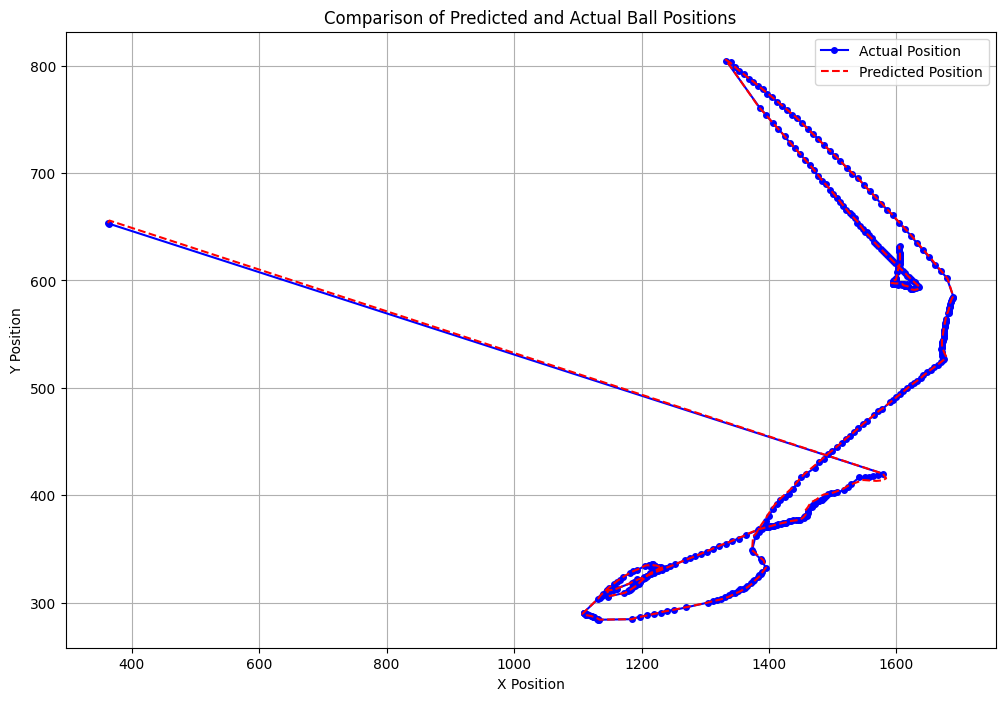

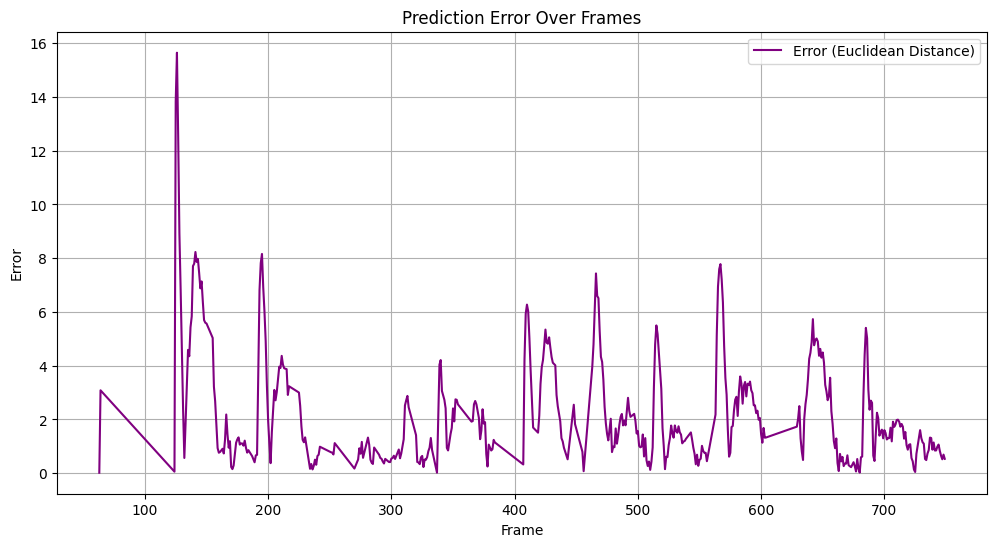

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
file_path = "positions.csv"  # Replace with the path to your file
data = pd.read_csv(file_path)

# Drop rows where actual positions are NaN (no detections)
filtered_data = data.dropna(subset=["Actual_X", "Actual_Y"])

# Extract relevant columns
frame_numbers = filtered_data["Frame"]
predicted_positions = filtered_data[["Predicted_X", "Predicted_Y"]].to_numpy()
actual_positions = filtered_data[["Actual_X", "Actual_Y"]].to_numpy()

# Calculate errors (Euclidean distance between predicted and actual positions)
errors = np.linalg.norm(predicted_positions - actual_positions, axis=1)

# Compute error metrics
mean_error = np.mean(errors)
rmse = np.sqrt(np.mean(errors ** 2))
max_error = np.max(errors)

# Print error metrics
print(f"Mean Error: {mean_error:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_error:.2f}")

# Plot predicted vs. actual positions
plt.figure(figsize=(12, 8))
plt.plot(actual_positions[:, 0], actual_positions[:, 1], label="Actual Position", color="blue", marker="o", markersize=4)
plt.plot(predicted_positions[:, 0], predicted_positions[:, 1], label="Predicted Position", color="red", linestyle="--")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Comparison of Predicted and Actual Ball Positions")
plt.legend()
plt.grid()
plt.show()

# Plot error over frames
plt.figure(figsize=(12, 6))
plt.plot(frame_numbers, errors, label="Error (Euclidean Distance)", color="purple")
plt.xlabel("Frame")
plt.ylabel("Error")
plt.title("Prediction Error Over Frames")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import supervision as sv
from tqdm import tqdm
import cv2
import csv

# Initialize EKF
ball_tracker = BallEKFPyKalman(dt=1/25)
  # Assuming 25  FPS

# Supervision annotators
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Video processing setup
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids/121364_0.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids/121364_0_result_1.mp4"

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

BALL_ID = 0  # Replace this with the actual class ID for the ball

# Initialize lists to store predicted and actual positions
predicted_positions = []  # Format: [(frame_index, predicted_x, predicted_y), ...]
actual_positions = []  # Format: [(frame_index, actual_x, actual_y), ...]

with video_sink:
    for frame_index, frame in enumerate(tqdm(frame_generator, total=video_info.total_frames)):

        # Infer detections for the current frame
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        # Separate ball detections
        ball_detections = detections[detections.class_id == BALL_ID]

        if len(ball_detections) > 0:
            # Get ball position and update EKF
            ball_x = (ball_detections.xyxy[0][0] + ball_detections.xyxy[0][2]) / 2
            ball_y = (ball_detections.xyxy[0][1] + ball_detections.xyxy[0][3]) / 2
            measurement = np.array([ball_x, ball_y])
            ball_tracker.update(measurement)

            # Save actual position
            actual_positions.append((frame_index, ball_x, ball_y))
        else:
            # No detection, predict based on EKF
            ball_tracker.predict()

            # Save a placeholder for missing actual position
            actual_positions.append((frame_index, None, None))

        # Get the current state
        state = ball_tracker.get_state()
        predicted_x, predicted_y = state[0], state[1]

        # Save predicted position
        predicted_positions.append((frame_index, predicted_x, predicted_y))

        # Annotate the ball
        annotated_frame = frame.copy()
        if len(ball_detections) > 0:
            annotated_frame = triangle_annotator.annotate(
                scene=annotated_frame, detections=ball_detections
            )
        else:
            # Draw predicted position if no detection
            cv2.circle(annotated_frame, (int(predicted_x), int(predicted_y)), 10, (0, 255, 0), -1)

        # Annotate other objects
        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections.class_id -= 1

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence in zip(all_detections['class_name'], all_detections.confidence)
        ]
        annotated_frame = box_annotator.annotate(annotated_frame, all_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

        # Write annotated frame to the video
        video_sink.write_frame(annotated_frame)

        # Print frame info every 5th frame
        if frame_index % 5 == 0:
            print(f"Frame {frame_index}: {len(detections)} detections")

# Save positions to a CSV file for comparison
output_file_path = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/positions.csv"
with open(output_file_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Frame", "Predicted_X", "Predicted_Y", "Actual_X", "Actual_Y"])
    for (frame_index_p, px, py), (frame_index_a, ax, ay) in zip(predicted_positions, actual_positions):
        writer.writerow([frame_index_p, px, py, ax, ay])

print(f"Predicted and actual positions saved to {output_file_path}")



  0%|          | 1/750 [00:00<04:54,  2.54it/s]

Frame 0: 22 detections


  1%|          | 6/750 [00:01<03:35,  3.46it/s]

Frame 5: 24 detections


  1%|▏         | 11/750 [00:03<03:26,  3.58it/s]

Frame 10: 24 detections


  2%|▏         | 16/750 [00:04<03:23,  3.60it/s]

Frame 15: 24 detections


  3%|▎         | 21/750 [00:06<03:24,  3.57it/s]

Frame 20: 23 detections


  3%|▎         | 26/750 [00:07<03:32,  3.41it/s]

Frame 25: 22 detections


  4%|▍         | 31/750 [00:09<03:34,  3.35it/s]

Frame 30: 23 detections


  5%|▍         | 36/750 [00:10<03:36,  3.29it/s]

Frame 35: 22 detections


  5%|▌         | 41/750 [00:11<03:22,  3.50it/s]

Frame 40: 23 detections


  6%|▌         | 46/750 [00:13<03:20,  3.52it/s]

Frame 45: 21 detections


  7%|▋         | 51/750 [00:14<03:19,  3.50it/s]

Frame 50: 23 detections


  7%|▋         | 56/750 [00:16<03:18,  3.50it/s]

Frame 55: 23 detections


  8%|▊         | 61/750 [00:17<03:16,  3.50it/s]

Frame 60: 22 detections


  9%|▉         | 66/750 [00:19<03:15,  3.50it/s]

Frame 65: 22 detections


  9%|▉         | 71/750 [00:20<03:16,  3.45it/s]

Frame 70: 21 detections


 10%|█         | 76/750 [00:22<03:27,  3.24it/s]

Frame 75: 21 detections


 11%|█         | 81/750 [00:23<03:32,  3.15it/s]

Frame 80: 21 detections


 11%|█▏        | 86/750 [00:25<03:18,  3.34it/s]

Frame 85: 21 detections


 12%|█▏        | 91/750 [00:26<03:12,  3.42it/s]

Frame 90: 23 detections


 13%|█▎        | 96/750 [00:28<03:11,  3.42it/s]

Frame 95: 23 detections


 13%|█▎        | 101/750 [00:29<03:13,  3.36it/s]

Frame 100: 23 detections


 14%|█▍        | 106/750 [00:31<03:12,  3.34it/s]

Frame 105: 23 detections


 15%|█▍        | 111/750 [00:32<03:11,  3.33it/s]

Frame 110: 23 detections


 15%|█▌        | 116/750 [00:34<03:09,  3.35it/s]

Frame 115: 23 detections


 16%|█▌        | 121/750 [00:35<03:17,  3.19it/s]

Frame 120: 23 detections


 17%|█▋        | 126/750 [00:37<03:58,  2.61it/s]

Frame 125: 22 detections


 17%|█▋        | 131/750 [00:39<03:53,  2.65it/s]

Frame 130: 23 detections


 18%|█▊        | 136/750 [00:41<03:08,  3.25it/s]

Frame 135: 23 detections


 19%|█▉        | 141/750 [00:42<03:00,  3.38it/s]

Frame 140: 22 detections


 19%|█▉        | 146/750 [00:44<02:56,  3.43it/s]

Frame 145: 22 detections


 20%|██        | 151/750 [00:45<02:55,  3.41it/s]

Frame 150: 23 detections


 21%|██        | 156/750 [00:46<02:52,  3.44it/s]

Frame 155: 22 detections


 21%|██▏       | 161/750 [00:48<02:51,  3.43it/s]

Frame 160: 22 detections


 22%|██▏       | 166/750 [00:49<02:57,  3.29it/s]

Frame 165: 22 detections


 23%|██▎       | 171/750 [00:51<02:58,  3.24it/s]

Frame 170: 22 detections


 23%|██▎       | 176/750 [00:52<02:55,  3.27it/s]

Frame 175: 23 detections


 24%|██▍       | 181/750 [00:54<02:44,  3.45it/s]

Frame 180: 23 detections


 25%|██▍       | 186/750 [00:55<02:41,  3.49it/s]

Frame 185: 21 detections


 25%|██▌       | 191/750 [00:57<02:41,  3.47it/s]

Frame 190: 22 detections


 26%|██▌       | 196/750 [00:58<02:39,  3.47it/s]

Frame 195: 22 detections


 27%|██▋       | 201/750 [01:00<02:37,  3.49it/s]

Frame 200: 22 detections


 27%|██▋       | 206/750 [01:01<02:35,  3.51it/s]

Frame 205: 23 detections


 28%|██▊       | 211/750 [01:03<02:35,  3.46it/s]

Frame 210: 22 detections


 29%|██▉       | 216/750 [01:04<02:43,  3.26it/s]

Frame 215: 21 detections


 29%|██▉       | 221/750 [01:06<02:43,  3.24it/s]

Frame 220: 22 detections


 30%|███       | 226/750 [01:07<02:35,  3.36it/s]

Frame 225: 23 detections


 31%|███       | 231/750 [01:09<02:28,  3.50it/s]

Frame 230: 23 detections


 31%|███▏      | 236/750 [01:10<02:25,  3.52it/s]

Frame 235: 24 detections


 32%|███▏      | 241/750 [01:11<02:24,  3.52it/s]

Frame 240: 24 detections


 33%|███▎      | 246/750 [01:13<02:23,  3.52it/s]

Frame 245: 24 detections


 33%|███▎      | 251/750 [01:14<02:21,  3.52it/s]

Frame 250: 22 detections


 34%|███▍      | 256/750 [01:16<02:20,  3.53it/s]

Frame 255: 22 detections


 35%|███▍      | 261/750 [01:17<02:21,  3.45it/s]

Frame 260: 23 detections


 35%|███▌      | 266/750 [01:19<02:24,  3.34it/s]

Frame 265: 24 detections


 36%|███▌      | 271/750 [01:20<02:24,  3.31it/s]

Frame 270: 24 detections


 37%|███▋      | 276/750 [01:22<02:18,  3.43it/s]

Frame 275: 24 detections


 37%|███▋      | 281/750 [01:23<02:13,  3.51it/s]

Frame 280: 24 detections


 38%|███▊      | 286/750 [01:24<02:11,  3.54it/s]

Frame 285: 24 detections


 39%|███▉      | 291/750 [01:26<02:10,  3.51it/s]

Frame 290: 23 detections


 39%|███▉      | 296/750 [01:27<02:09,  3.51it/s]

Frame 295: 24 detections


 40%|████      | 301/750 [01:29<02:07,  3.51it/s]

Frame 300: 24 detections


 41%|████      | 306/750 [01:30<02:07,  3.48it/s]

Frame 305: 23 detections


 41%|████▏     | 311/750 [01:32<02:09,  3.38it/s]

Frame 310: 24 detections


 42%|████▏     | 316/750 [01:33<02:12,  3.29it/s]

Frame 315: 24 detections


 43%|████▎     | 321/750 [01:35<02:12,  3.24it/s]

Frame 320: 24 detections


 43%|████▎     | 326/750 [01:36<02:03,  3.42it/s]

Frame 325: 24 detections


 44%|████▍     | 331/750 [01:37<01:59,  3.50it/s]

Frame 330: 24 detections


 45%|████▍     | 336/750 [01:39<01:58,  3.49it/s]

Frame 335: 22 detections


 45%|████▌     | 341/750 [01:40<01:56,  3.51it/s]

Frame 340: 22 detections


 46%|████▌     | 346/750 [01:42<01:56,  3.48it/s]

Frame 345: 22 detections


 47%|████▋     | 351/750 [01:43<01:53,  3.51it/s]

Frame 350: 21 detections


 47%|████▋     | 356/750 [01:45<01:52,  3.50it/s]

Frame 355: 22 detections


 48%|████▊     | 361/750 [01:46<01:56,  3.35it/s]

Frame 360: 22 detections


 49%|████▉     | 366/750 [01:48<01:57,  3.28it/s]

Frame 365: 22 detections


 49%|████▉     | 371/750 [01:49<01:56,  3.26it/s]

Frame 370: 21 detections


 50%|█████     | 376/750 [01:51<01:49,  3.43it/s]

Frame 375: 23 detections


 51%|█████     | 381/750 [01:52<01:45,  3.49it/s]

Frame 380: 23 detections


 51%|█████▏    | 386/750 [01:54<01:44,  3.48it/s]

Frame 385: 23 detections


 52%|█████▏    | 391/750 [01:55<01:43,  3.48it/s]

Frame 390: 23 detections


 53%|█████▎    | 396/750 [01:56<01:41,  3.50it/s]

Frame 395: 23 detections


 53%|█████▎    | 401/750 [01:58<01:41,  3.44it/s]

Frame 400: 23 detections


 54%|█████▍    | 406/750 [01:59<01:41,  3.40it/s]

Frame 405: 24 detections


 55%|█████▍    | 411/750 [02:01<01:43,  3.27it/s]

Frame 410: 24 detections


 55%|█████▌    | 416/750 [02:02<01:44,  3.20it/s]

Frame 415: 24 detections


 56%|█████▌    | 421/750 [02:04<01:39,  3.32it/s]

Frame 420: 23 detections


 57%|█████▋    | 426/750 [02:05<01:33,  3.45it/s]

Frame 425: 24 detections


 57%|█████▋    | 431/750 [02:07<01:31,  3.47it/s]

Frame 430: 24 detections


 58%|█████▊    | 436/750 [02:08<01:30,  3.48it/s]

Frame 435: 24 detections


 59%|█████▉    | 441/750 [02:10<01:29,  3.44it/s]

Frame 440: 24 detections


 59%|█████▉    | 446/750 [02:11<01:28,  3.45it/s]

Frame 445: 23 detections


 60%|██████    | 451/750 [02:13<01:26,  3.47it/s]

Frame 450: 22 detections


 61%|██████    | 456/750 [02:14<01:28,  3.34it/s]

Frame 455: 24 detections


 61%|██████▏   | 461/750 [02:16<01:28,  3.25it/s]

Frame 460: 24 detections


 62%|██████▏   | 466/750 [02:17<01:26,  3.27it/s]

Frame 465: 24 detections


 63%|██████▎   | 471/750 [02:19<01:22,  3.40it/s]

Frame 470: 24 detections


 63%|██████▎   | 476/750 [02:20<01:19,  3.43it/s]

Frame 475: 23 detections


 64%|██████▍   | 481/750 [02:22<01:17,  3.48it/s]

Frame 480: 23 detections


 65%|██████▍   | 486/750 [02:23<01:15,  3.48it/s]

Frame 485: 23 detections


 65%|██████▌   | 491/750 [02:24<01:13,  3.50it/s]

Frame 490: 23 detections


 66%|██████▌   | 496/750 [02:26<01:13,  3.48it/s]

Frame 495: 21 detections


 67%|██████▋   | 501/750 [02:27<01:11,  3.49it/s]

Frame 500: 21 detections


 67%|██████▋   | 506/750 [02:29<01:15,  3.25it/s]

Frame 505: 23 detections


 68%|██████▊   | 511/750 [02:30<01:14,  3.19it/s]

Frame 510: 22 detections


 69%|██████▉   | 516/750 [02:32<01:10,  3.30it/s]

Frame 515: 22 detections


 69%|██████▉   | 521/750 [02:33<01:06,  3.45it/s]

Frame 520: 22 detections


 70%|███████   | 526/750 [02:35<01:04,  3.49it/s]

Frame 525: 22 detections


 71%|███████   | 531/750 [02:36<01:02,  3.49it/s]

Frame 530: 22 detections


 71%|███████▏  | 536/750 [02:38<01:00,  3.51it/s]

Frame 535: 22 detections


 72%|███████▏  | 541/750 [02:39<00:59,  3.51it/s]

Frame 540: 22 detections


 73%|███████▎  | 546/750 [02:41<00:58,  3.46it/s]

Frame 545: 22 detections


 73%|███████▎  | 551/750 [02:42<00:58,  3.41it/s]

Frame 550: 23 detections


 74%|███████▍  | 556/750 [02:44<00:59,  3.27it/s]

Frame 555: 22 detections


 75%|███████▍  | 561/750 [02:45<00:59,  3.20it/s]

Frame 560: 24 detections


 75%|███████▌  | 566/750 [02:47<00:53,  3.42it/s]

Frame 565: 23 detections


 76%|███████▌  | 571/750 [02:48<00:51,  3.48it/s]

Frame 570: 21 detections


 77%|███████▋  | 576/750 [02:49<00:49,  3.51it/s]

Frame 575: 22 detections


 77%|███████▋  | 581/750 [02:51<00:48,  3.51it/s]

Frame 580: 23 detections


 78%|███████▊  | 586/750 [02:52<00:47,  3.48it/s]

Frame 585: 22 detections


 79%|███████▉  | 591/750 [02:54<00:45,  3.50it/s]

Frame 590: 23 detections


 79%|███████▉  | 596/750 [02:55<00:44,  3.48it/s]

Frame 595: 24 detections


 80%|████████  | 601/750 [02:57<00:44,  3.37it/s]

Frame 600: 24 detections


 81%|████████  | 606/750 [02:58<00:43,  3.28it/s]

Frame 605: 24 detections


 81%|████████▏ | 611/750 [03:00<00:43,  3.20it/s]

Frame 610: 23 detections


 82%|████████▏ | 616/750 [03:01<00:38,  3.45it/s]

Frame 615: 24 detections


 83%|████████▎ | 621/750 [03:03<00:36,  3.50it/s]

Frame 620: 21 detections


 83%|████████▎ | 626/750 [03:04<00:35,  3.48it/s]

Frame 625: 21 detections


 84%|████████▍ | 631/750 [03:05<00:33,  3.51it/s]

Frame 630: 22 detections


 85%|████████▍ | 636/750 [03:07<00:32,  3.49it/s]

Frame 635: 23 detections


 85%|████████▌ | 641/750 [03:08<00:31,  3.50it/s]

Frame 640: 22 detections


 86%|████████▌ | 646/750 [03:10<00:30,  3.45it/s]

Frame 645: 23 detections


 87%|████████▋ | 651/750 [03:11<00:30,  3.25it/s]

Frame 650: 22 detections


 87%|████████▋ | 656/750 [03:13<00:28,  3.25it/s]

Frame 655: 22 detections


 88%|████████▊ | 661/750 [03:14<00:27,  3.27it/s]

Frame 660: 22 detections


 89%|████████▉ | 666/750 [03:16<00:24,  3.46it/s]

Frame 665: 21 detections


 89%|████████▉ | 671/750 [03:17<00:22,  3.49it/s]

Frame 670: 22 detections


 90%|█████████ | 676/750 [03:19<00:21,  3.50it/s]

Frame 675: 23 detections


 91%|█████████ | 681/750 [03:20<00:19,  3.51it/s]

Frame 680: 22 detections


 91%|█████████▏| 686/750 [03:22<00:18,  3.49it/s]

Frame 685: 22 detections


 92%|█████████▏| 691/750 [03:23<00:16,  3.50it/s]

Frame 690: 21 detections


 93%|█████████▎| 696/750 [03:24<00:15,  3.44it/s]

Frame 695: 22 detections


 93%|█████████▎| 701/750 [03:26<00:14,  3.32it/s]

Frame 700: 23 detections


 94%|█████████▍| 706/750 [03:27<00:13,  3.25it/s]

Frame 705: 22 detections


 95%|█████████▍| 711/750 [03:29<00:11,  3.34it/s]

Frame 710: 23 detections


 95%|█████████▌| 716/750 [03:30<00:09,  3.46it/s]

Frame 715: 20 detections


 96%|█████████▌| 721/750 [03:32<00:08,  3.47it/s]

Frame 720: 21 detections


 97%|█████████▋| 726/750 [03:33<00:06,  3.46it/s]

Frame 725: 20 detections


 97%|█████████▋| 731/750 [03:35<00:05,  3.48it/s]

Frame 730: 22 detections


 98%|█████████▊| 736/750 [03:36<00:04,  3.47it/s]

Frame 735: 22 detections


 99%|█████████▉| 741/750 [03:38<00:02,  3.45it/s]

Frame 740: 24 detections


 99%|█████████▉| 746/750 [03:39<00:01,  3.41it/s]

Frame 745: 23 detections


100%|██████████| 750/750 [03:40<00:00,  3.40it/s]

Predicted and actual positions saved to /content/drive/MyDrive/PMR PROJEKT/positions.csv


Mean Error: 3.44
Root Mean Square Error (RMSE): 14.22
Max Error: 215.16


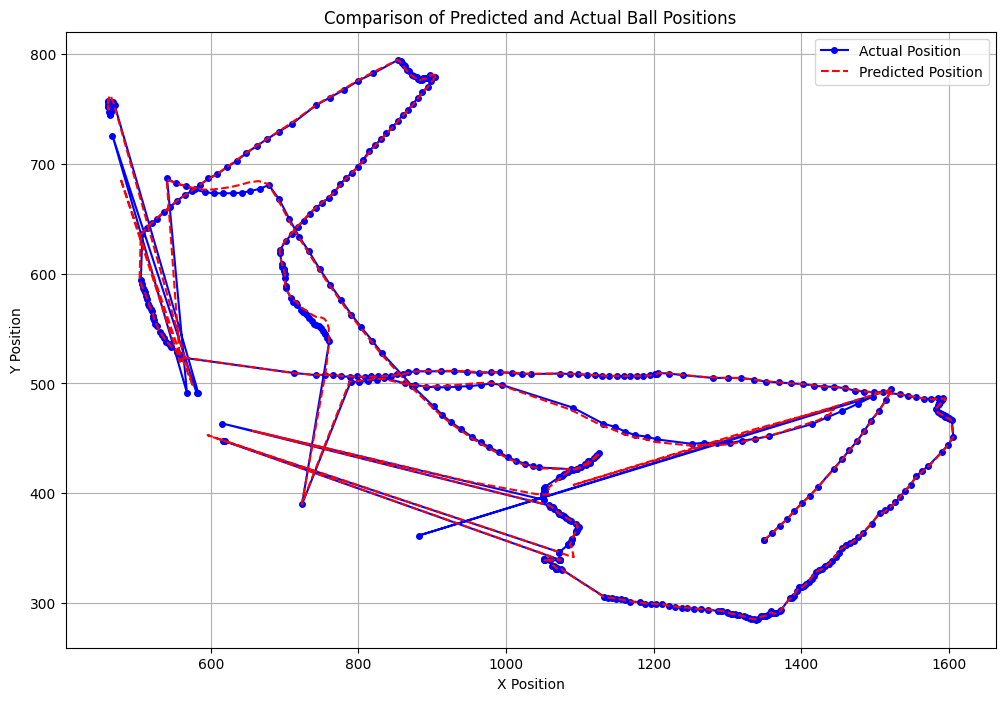

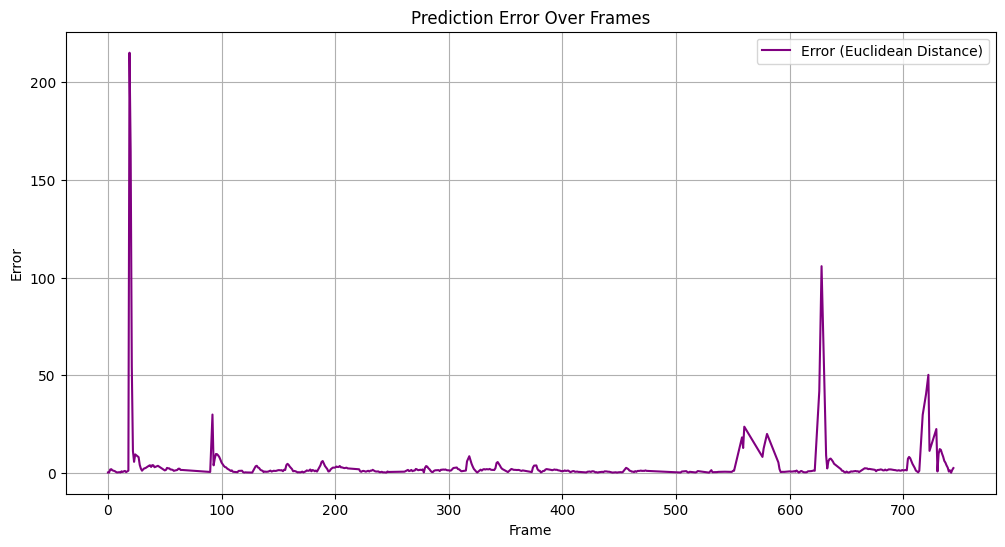

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
file_path = "positions.csv"  # Replace with the path to your file
data = pd.read_csv(file_path)

# Drop rows where actual positions are NaN (no detections)
filtered_data = data.dropna(subset=["Actual_X", "Actual_Y"])

# Extract relevant columns
frame_numbers = filtered_data["Frame"]
predicted_positions = filtered_data[["Predicted_X", "Predicted_Y"]].to_numpy()
actual_positions = filtered_data[["Actual_X", "Actual_Y"]].to_numpy()

# Calculate errors (Euclidean distance between predicted and actual positions)
errors = np.linalg.norm(predicted_positions - actual_positions, axis=1)

# Compute error metrics
mean_error = np.mean(errors)
rmse = np.sqrt(np.mean(errors ** 2))
max_error = np.max(errors)

# Print error metrics
print(f"Mean Error: {mean_error:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_error:.2f}")

# Plot predicted vs. actual positions
plt.figure(figsize=(12, 8))
plt.plot(actual_positions[:, 0], actual_positions[:, 1], label="Actual Position", color="blue", marker="o", markersize=4)
plt.plot(predicted_positions[:, 0], predicted_positions[:, 1], label="Predicted Position", color="red", linestyle="--")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Comparison of Predicted and Actual Ball Positions")
plt.legend()
plt.grid()
plt.show()

# Plot error over frames
plt.figure(figsize=(12, 6))
plt.plot(frame_numbers, errors, label="Error (Euclidean Distance)", color="purple")
plt.xlabel("Frame")
plt.ylabel("Error")
plt.title("Prediction Error Over Frames")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import supervision as sv
from tqdm import tqdm
import cv2
import csv

# Initialize EKF
ball_tracker = BallEKFPyKalman(dt=1/25)
  # Assuming 25  FPS

# Supervision annotators
box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# Video processing setup
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids/test.mp4"
TARGET_VIDEO_PATH = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/vids/test_result_1.mp4"

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)
frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

BALL_ID = 0  # Replace this with the actual class ID for the ball

# Initialize lists to store predicted and actual positions
predicted_positions = []  # Format: [(frame_index, predicted_x, predicted_y), ...]
actual_positions = []  # Format: [(frame_index, actual_x, actual_y), ...]

with video_sink:
    for frame_index, frame in enumerate(tqdm(frame_generator, total=video_info.total_frames)):

        # Infer detections for the current frame
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        # Separate ball detections
        ball_detections = detections[detections.class_id == BALL_ID]

        if len(ball_detections) > 0:
            # Get ball position and update EKF
            ball_x = (ball_detections.xyxy[0][0] + ball_detections.xyxy[0][2]) / 2
            ball_y = (ball_detections.xyxy[0][1] + ball_detections.xyxy[0][3]) / 2
            measurement = np.array([ball_x, ball_y])
            ball_tracker.update(measurement)

            # Save actual position
            actual_positions.append((frame_index, ball_x, ball_y))
        else:
            # No detection, predict based on EKF
            ball_tracker.predict()

            # Save a placeholder for missing actual position
            actual_positions.append((frame_index, None, None))

        # Get the current state
        state = ball_tracker.get_state()
        predicted_x, predicted_y = state[0], state[1]

        # Save predicted position
        predicted_positions.append((frame_index, predicted_x, predicted_y))

        # Annotate the ball
        annotated_frame = frame.copy()
        if len(ball_detections) > 0:
            annotated_frame = triangle_annotator.annotate(
                scene=annotated_frame, detections=ball_detections
            )
        else:
            # Draw predicted position if no detection
            cv2.circle(annotated_frame, (int(predicted_x), int(predicted_y)), 10, (0, 255, 0), -1)

        # Annotate other objects
        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections.class_id -= 1

        labels = [
            f"{class_name} {confidence:.2f}"
            for class_name, confidence in zip(all_detections['class_name'], all_detections.confidence)
        ]
        annotated_frame = box_annotator.annotate(annotated_frame, all_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)

        # Write annotated frame to the video
        video_sink.write_frame(annotated_frame)

        # Print frame info every 5th frame
        if frame_index % 5 == 0:
            print(f"Frame {frame_index}: {len(detections)} detections")

# Save positions to a CSV file for comparison
output_file_path = "/content/drive/MyDrive/Object-Tracking-EKF-YOLO/positions.csv"
with open(output_file_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Frame", "Predicted_X", "Predicted_Y", "Actual_X", "Actual_Y"])
    for (frame_index_p, px, py), (frame_index_a, ax, ay) in zip(predicted_positions, actual_positions):
        writer.writerow([frame_index_p, px, py, ax, ay])

print(f"Predicted and actual positions saved to {output_file_path}")



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your data
file_path = "positions.csv"  # Replace with the path to your file
data = pd.read_csv(file_path)

# Drop rows where actual positions are NaN (no detections)
filtered_data = data.dropna(subset=["Actual_X", "Actual_Y"])

# Extract relevant columns
frame_numbers = filtered_data["Frame"]
predicted_positions = filtered_data[["Predicted_X", "Predicted_Y"]].to_numpy()
actual_positions = filtered_data[["Actual_X", "Actual_Y"]].to_numpy()

# Calculate errors (Euclidean distance between predicted and actual positions)
errors = np.linalg.norm(predicted_positions - actual_positions, axis=1)

# Compute error metrics
mean_error = np.mean(errors)
rmse = np.sqrt(np.mean(errors ** 2))
max_error = np.max(errors)

# Print error metrics
print(f"Mean Error: {mean_error:.2f}")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"Max Error: {max_error:.2f}")

# Plot predicted vs. actual positions
plt.figure(figsize=(12, 8))
plt.plot(actual_positions[:, 0], actual_positions[:, 1], label="Actual Position", color="blue", marker="o", markersize=4)
plt.plot(predicted_positions[:, 0], predicted_positions[:, 1], label="Predicted Position", color="red", linestyle="--")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Comparison of Predicted and Actual Ball Positions")
plt.legend()
plt.grid()
plt.show()

# Plot error over frames
plt.figure(figsize=(12, 6))
plt.plot(frame_numbers, errors, label="Error (Euclidean Distance)", color="purple")
plt.xlabel("Frame")
plt.ylabel("Error")
plt.title("Prediction Error Over Frames")
plt.legend()
plt.grid()
plt.show()


In [9]:
from google.colab import drive
drive.mount('/content/drive')


!pwd

os.chdir("/content/drive/MyDrive/Object-Tracking-EKF-YOLO")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/11uAmQYBPCX5jmcPwQdqLXPlNcKBuVZFx/Object-Tracking-EKF-YOLO/vids


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Object-Tracking-EKF-YOLO'